In [1]:
import numpy as np
#  Sample time series data
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
print("Original data:\n", data)
#  Function to create input sequences and corresponding targets
def create_sequences(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])  # 3 time steps as input
        y.append(data[i + time_steps, 0])    # next value as label
    return np.array(X), np.array(y)
# Create sequences
time_steps = 3
X, y = create_sequences(data, time_steps)
print("\nInput sequences (X):")
print(X)
print("\nTargets (y):")
print(y)
# Reshape X for RNN input: (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)
print("\nReshaped X for RNN:", X.shape)


Original data:
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

Input sequences (X):
[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]

Targets (y):
[ 4  5  6  7  8  9 10]

Reshaped X for RNN: (7, 3, 1)


In [2]:
import numpy as np
# Sample 2D time series data (10 time steps, 2 features)
# Columns: [Temperature, Humidity]
data = np.array([
    [30, 60],
    [31, 62],
    [32, 63],
    [33, 65],
    [34, 66],
    [35, 67],
    [36, 69],
    [37, 70],
    [38, 72],
    [39, 74]
])
print("Original data:\n", data)
# Function to create input-output sequences
def create_sequences(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])   # take last 3 time steps
        y.append(data[i + time_steps])     # predict next step (all features)
    return np.array(X), np.array(y)
#  Create sequences
time_steps = 3
X, y = create_sequences(data, time_steps)
print("\nInput sequences (X):")
print(X)
print("\nTargets (y):")
print(y)
# Check shapes
print("\nShapes:")
print("X:", X.shape)  # (samples, time_steps, features)
print("y:", y.shape)  # (samples, features)


Original data:
 [[30 60]
 [31 62]
 [32 63]
 [33 65]
 [34 66]
 [35 67]
 [36 69]
 [37 70]
 [38 72]
 [39 74]]

Input sequences (X):
[[[30 60]
  [31 62]
  [32 63]]

 [[31 62]
  [32 63]
  [33 65]]

 [[32 63]
  [33 65]
  [34 66]]

 [[33 65]
  [34 66]
  [35 67]]

 [[34 66]
  [35 67]
  [36 69]]

 [[35 67]
  [36 69]
  [37 70]]

 [[36 69]
  [37 70]
  [38 72]]]

Targets (y):
[[33 65]
 [34 66]
 [35 67]
 [36 69]
 [37 70]
 [38 72]
 [39 74]]

Shapes:
X: (7, 3, 2)
y: (7, 2)


In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
# Sample 2D time series data (10 time steps, 2 features)
data = np.array([
    [30, 60],
    [31, 62],
    [32, 63],
    [33, 65],
    [34, 66],
    [35, 67],
    [36, 69],
    [37, 70],
    [38, 72],
    [39, 74]
])

# Function to create sequences
def create_sequences(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)
time_steps = 3
X, y = create_sequences(data, time_steps)
print("X shape:", X.shape)  # (samples, time_steps, features)
print("y shape:", y.shape)  # (samples, features)
#  Build Simple RNN model
model = Sequential()
model.add(SimpleRNN(32, activation='tanh', input_shape=(time_steps, 2)))  # 2 features
model.add(Dense(2))  # Output both features: temperature & humidity
model.compile(optimizer='adam', loss='mse')
#  Train the model
model.fit(X, y, epochs=5000, verbose=1)
#  Make predictions
predictions = model.predict(X, verbose=1)
print("\nPredictions:")
print(np.round(predictions, 2))
print("\nActual Next Steps:")
print(y)


X shape: (7, 3, 2)
y shape: (7, 2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 50.9922
Epoch 2511/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 50.8807
Epoch 2512/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 50.7694
Epoch 2513/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 50.6583
Epoch 2514/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 50.5475
Epoch 2515/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 50.4368
Epoch 2516/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 50.3264
Epoch 2517/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 50.2162
Epoch 2518/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 50.1063
Epoch 2519/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 49.9966
Epoch 2520/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 49.8871
Epoch 2521/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 49.7778
Epoch 2522/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 49.6688
Epoch 2523/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step -

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


🔹 Predicted values:
[[33.02 64.96]
 [33.98 65.98]
 [34.94 67.12]
 [36.05 68.66]
 [37.   70.22]
 [37.97 71.92]
 [38.98 73.88]]

🔹 Actual next values:
[[33 65]
 [34 66]
 [35 67]
 [36 69]
 [37 70]
 [38 72]
 [39 74]]


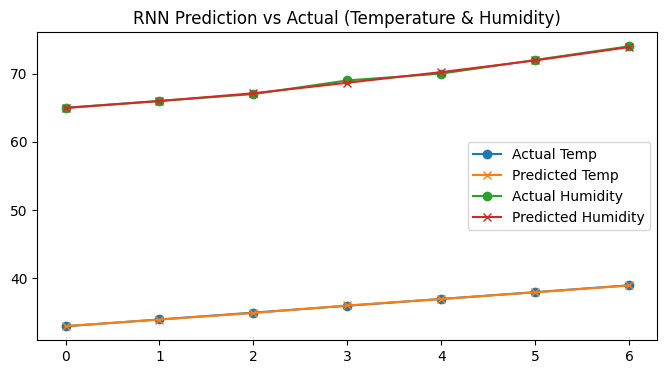

In [4]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

# Sample 2D time series data (10 time steps, 2 features)
data = np.array([
    [30, 60],
    [31, 62],
    [32, 63],
    [33, 65],
    [34, 66],
    [35, 67],
    [36, 69],
    [37, 70],
    [38, 72],
    [39, 74]
])

#  Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

#  Function to create sequences
def create_sequences(data, time_steps=3):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 3
X, y = create_sequences(data_scaled, time_steps)

# Build improved RNN model
model = Sequential([
    SimpleRNN(8, activation='tanh', input_shape=(time_steps, 2)),
    Dense(2)
])
model.compile(optimizer='adam', loss='mse')

#  Train model
model.fit(X, y, epochs=1000, batch_size=1, verbose=0)

# Predict
pred_scaled = model.predict(X, verbose=0)
pred = scaler.inverse_transform(pred_scaled)

#  Display Results
print("🔹 Predicted values:")
print(np.round(pred, 2))

print("\n🔹 Actual next values:")
print(data[time_steps:])

# Compare visually
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(data[time_steps:, 0], label="Actual Temp", marker='o')
plt.plot(pred[:, 0], label="Predicted Temp", marker='x')
plt.plot(data[time_steps:, 1], label="Actual Humidity", marker='o')
plt.plot(pred[:, 1], label="Predicted Humidity", marker='x')
plt.title("RNN Prediction vs Actual (Temperature & Humidity)")
plt.legend()
plt.show()


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0193
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6428e-04
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1307e-04
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9653e-04
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7492e-04
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6730e-04
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5794e-04
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4139e-04
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6885e-04
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.3684e-04
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2658e-04
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2278e-04
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2019e-04
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1251e-04
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5

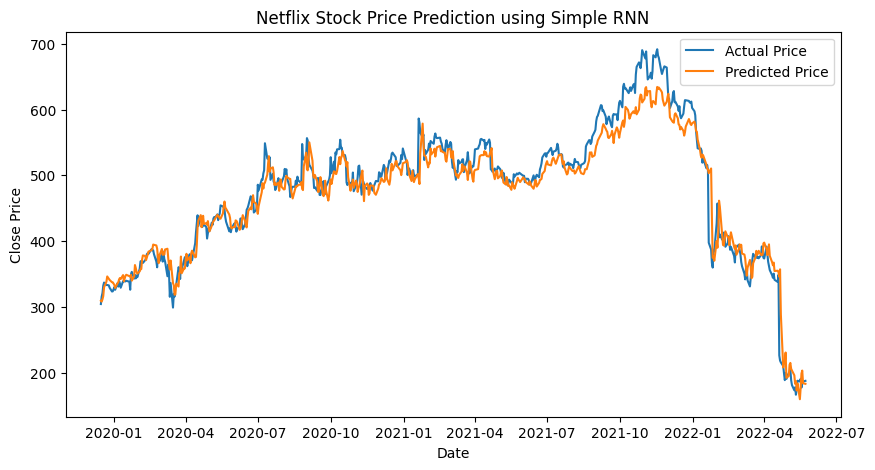

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
#  Load dataset
data = pd.read_csv('/content/NFLX.csv')
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
# Use only the 'Close' column
close_prices = data['Close'].values.reshape(-1, 1)
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)
# Create sequences
def create_sequences(data, time_steps=50):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)
time_steps = 50
X, y = create_sequences(scaled_data, time_steps)
# Split into train/test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
#  Build simple RNN model
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(time_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
# Train model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
# Predict
pred_scaled = model.predict(X_test)
pred = scaler.inverse_transform(pred_scaled)
y_actual = scaler.inverse_transform(y_test)
# Plot results
plt.figure(figsize=(10,5))
plt.plot(data.index[-len(y_test):], y_actual, label='Actual Price')
plt.plot(data.index[-len(y_test):], pred, label='Predicted Price')
plt.title('Netflix Stock Price Prediction using Simple RNN')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [8]:
df_weather = pd.read_csv('/content/seattle-weather.csv')
display(df_weather.head())
display(df_weather.info())

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


None

In [9]:
df_weather['date'] = pd.to_datetime(df_weather['date'])
df_weather = df_weather.set_index('date')
features = ['precipitation', 'temp_max', 'temp_min', 'wind']
df_features = df_weather[features]
display(df_features.head())

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-01,0.0,12.8,5.0,4.7
2012-01-02,10.9,10.6,2.8,4.5
2012-01-03,0.8,11.7,7.2,2.3
2012-01-04,20.3,12.2,5.6,4.7
2012-01-05,1.3,8.9,2.8,6.1


In [10]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_features)

In [11]:
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)
time_steps = 20
X, y = create_sequences(scaled_features, time_steps)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1441, 20, 4)
Shape of y: (1441, 4)


In [14]:
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(time_steps, X.shape[2])),
    Dense(y.shape[1])
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0933
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0224
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0160
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0130
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0133
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0130
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0126
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124
Epoch 14/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113
Epoch 15/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119
Epoch 16/50
46/46 ━━━━━━━━━━━

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


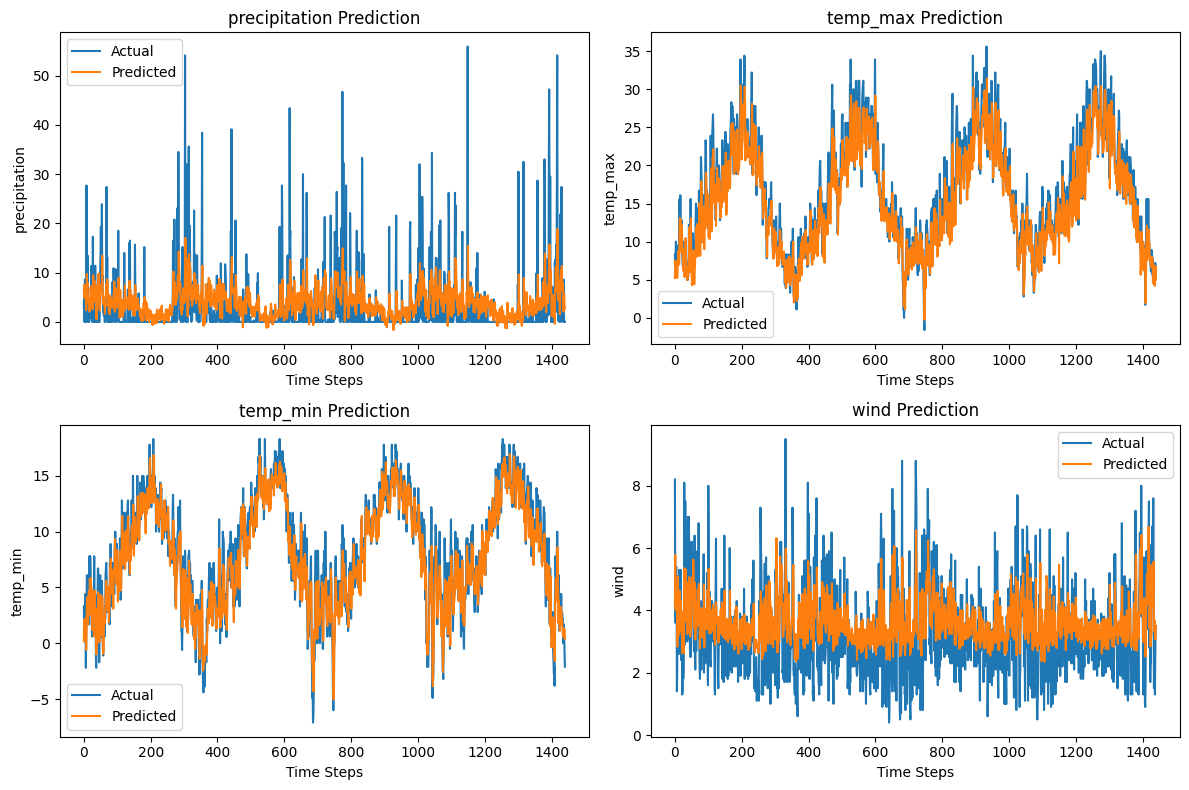

In [13]:
predictions_scaled = model.predict(X)
predictions = scaler.inverse_transform(predictions_scaled)
y_actual = scaler.inverse_transform(y)
plt.figure(figsize=(12, 8))
features = df_features.columns
for i in range(len(features)):
    plt.subplot(2, 2, i + 1)
    plt.plot(y_actual[:, i], label='Actual')
    plt.plot(predictions[:, i], label='Predicted')
    plt.title(f'{features[i]} Prediction')
    plt.xlabel('Time Steps')
    plt.ylabel(features[i])
    plt.legend()
plt.tight_layout()
plt.show()